In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader.data as pdweb

from pandas_datareader.data import DataReader
from datetime import datetime


In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,233.799008,229.613929,231.473531,231.922857,2.877633e+07,230.521529
std,45.118373,44.275068,44.619609,44.850701,1.170700e+07,45.444601
min,173.070007,169.500000,170.320007,172.500000,1.136200e+07,170.271317
25%,200.529999,197.844997,198.770000,199.182495,2.111072e+07,196.884155
50%,213.809998,210.275002,211.445000,211.135002,2.622035e+07,209.228790
75%,266.620003,262.572495,264.227509,265.624992,3.291428e+07,264.996071
max,327.850006,323.350006,324.739990,327.200012,1.066275e+08,327.200012


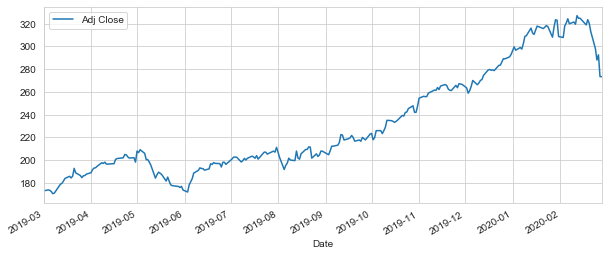

In [6]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

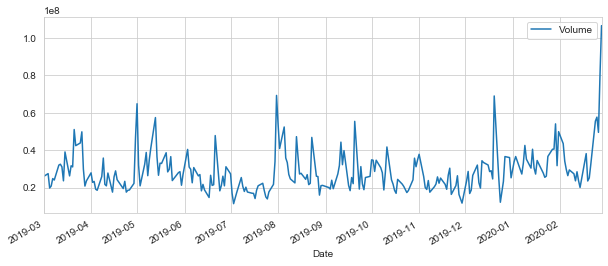

In [7]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [8]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    
AAPL.tail()    

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-02-24,304.179993,289.230011,297.260010,298.179993,55548800.0,298.179993,319.232996,318.206094,305.177838
2020-02-25,302.529999,286.130005,300.950012,288.079987,57668400.0,288.079987,315.885995,317.199168,305.536860
2020-02-26,297.880005,286.500000,286.529999,292.649994,49513700.0,292.649994,313.189996,315.984778,305.973514
2020-02-27,286.000000,272.959991,281.100006,273.519989,80151400.0,273.519989,307.821994,313.482175,305.953943
2020-02-28,278.410004,256.369995,257.260010,273.359985,106627500.0,273.359985,302.670993,310.995015,305.837196


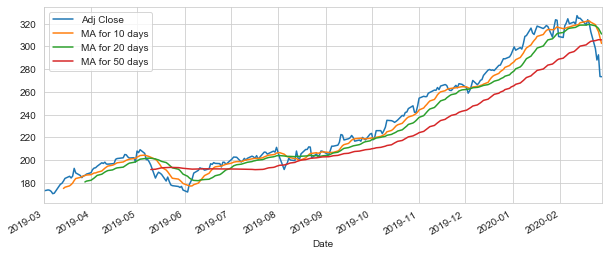

In [9]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))

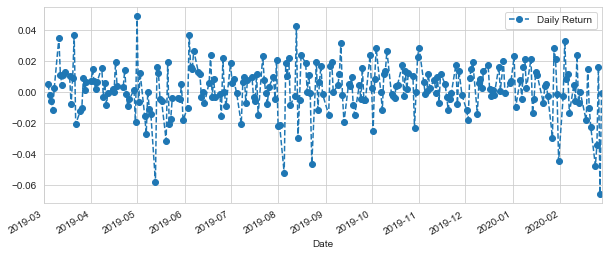

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10, 4), legend= True, linestyle = '--', marker = 'o' )


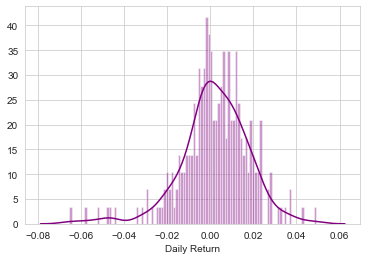

In [11]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color= 'purple')

In [12]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [13]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-03-01,172.709381,1671.729980,1140.989990,111.060608
2019-03-04,173.578033,1696.170044,1147.800049,110.794128
2019-03-05,173.262161,1692.430054,1162.030029,110.241432
2019-03-06,172.265228,1668.949951,1157.859985,110.290787
2019-03-07,170.271317,1625.949951,1143.300049,108.948540


In [14]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-03-01,NaN,NaN,NaN,NaN
2019-03-04,0.005030,0.014620,0.005969,-0.002399
2019-03-05,-0.001820,-0.002205,0.012398,-0.004988
2019-03-06,-0.005754,-0.013874,-0.003589,0.000448
2019-03-07,-0.011575,-0.025765,-0.012575,-0.012170


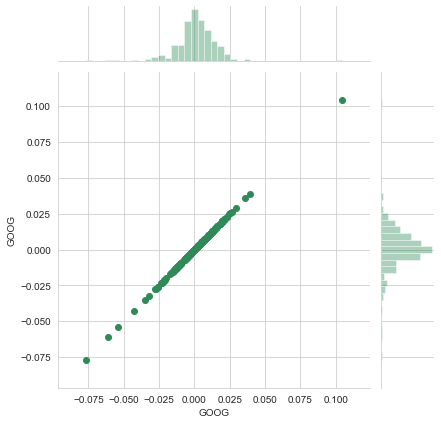

In [15]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

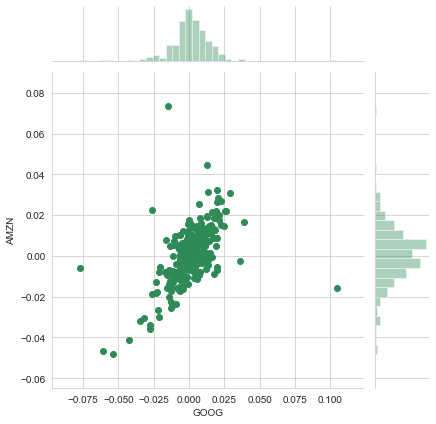

In [16]:
sns.jointplot('GOOG', 'AMZN', tech_rets, kind='scatter', color='seagreen')

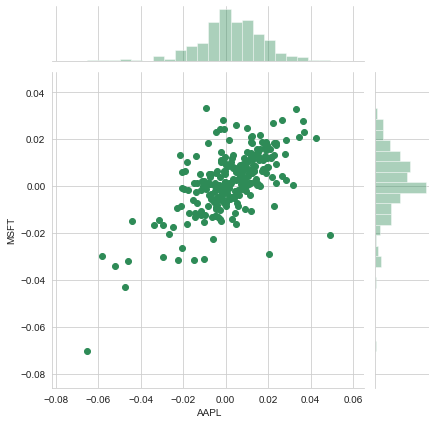

In [17]:
sns.jointplot('AAPL', 'MSFT', tech_rets, kind='scatter', color='seagreen')

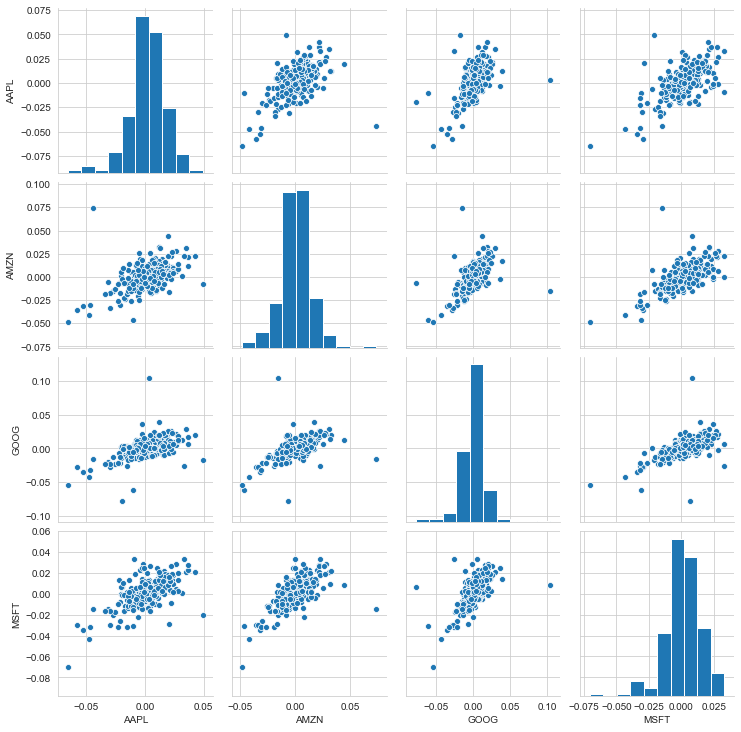

In [18]:
sns.pairplot(tech_rets.dropna())

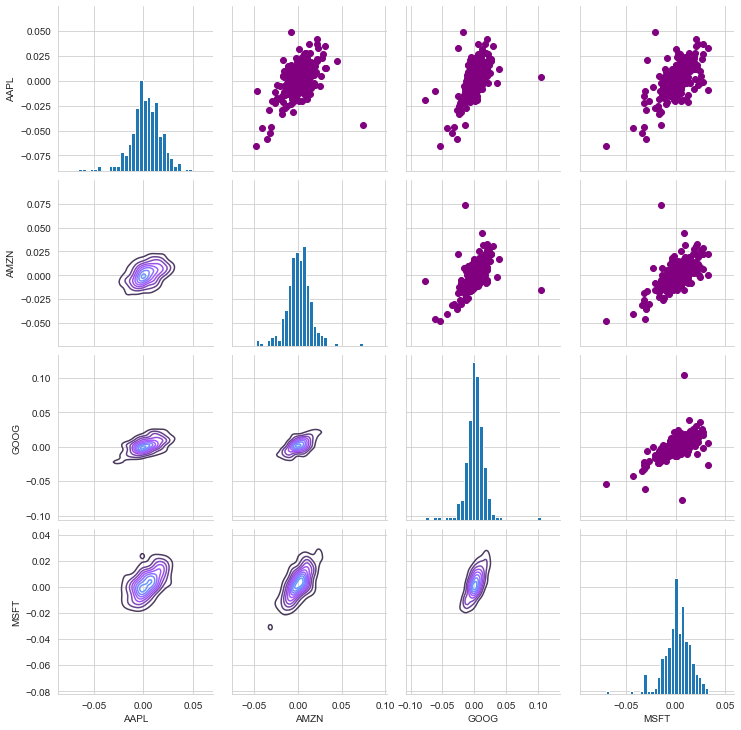

In [19]:
ret_fig = sns.PairGrid(tech_rets.dropna())

ret_fig.map_upper(plt.scatter, color='purple')

ret_fig.map_lower(sns.kdeplot, cmap='cool_d')

ret_fig.map_diag(plt.hist, bins=30)

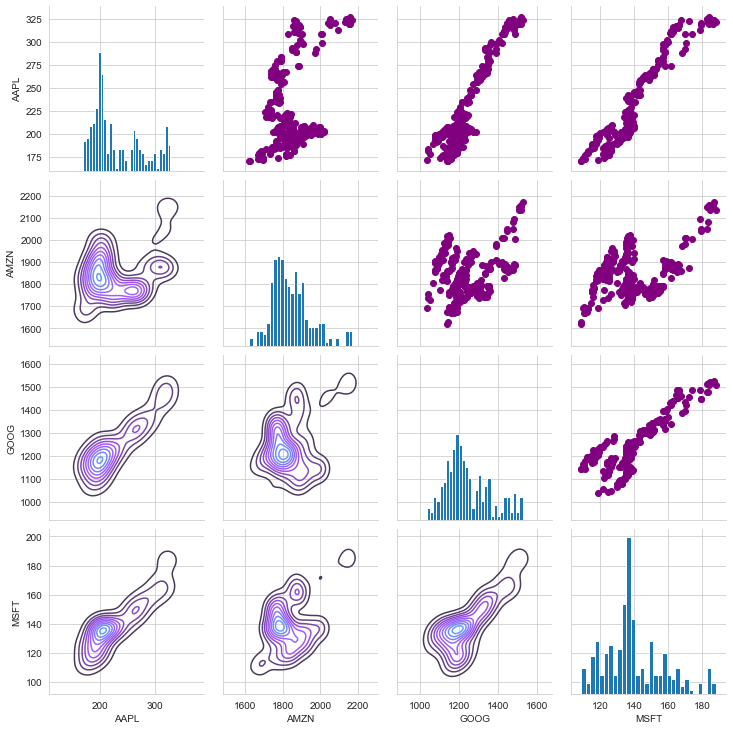

In [20]:
ret_fig = sns.PairGrid(closing_df)

ret_fig.map_upper(plt.scatter, color='purple')

ret_fig.map_lower(sns.kdeplot, cmap='cool_d')

ret_fig.map_diag(plt.hist, bins=30)

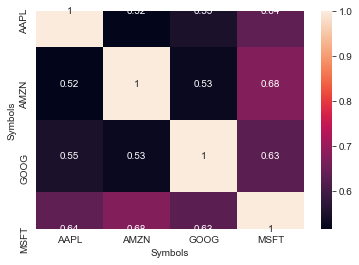

In [21]:
sns.heatmap(tech_rets.dropna().corr(), annot=True)

In [22]:
rets = tech_rets.dropna()

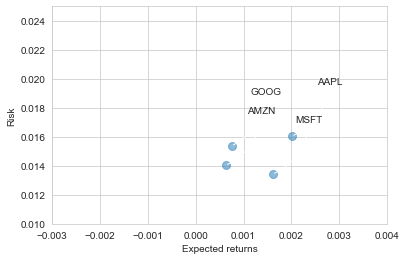

In [29]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])


plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

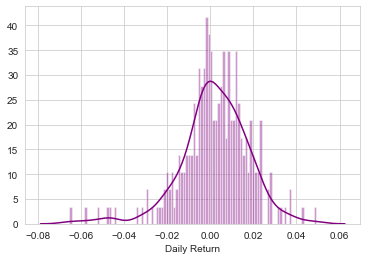

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [24]:
rets['AAPL'].quantile(0.05)

-0.022881478747003747

In [25]:
days = 365

dt =1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']



In [29]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    
    



In [30]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-01,1142.969971,1124.750000,1124.900024,1140.989990,1450300,1140.989990
2019-03-04,1158.280029,1130.689941,1146.989990,1147.800049,1446000,1147.800049
2019-03-05,1169.609985,1146.194946,1150.060059,1162.030029,1443200,1162.030029
2019-03-06,1167.566040,1155.489990,1162.489990,1157.859985,1099300,1157.859985
2019-03-07,1156.755005,1134.910034,1155.719971,1143.300049,1166600,1143.300049


Text(0.5, 1.0, 'Monte cArlo Analysis')

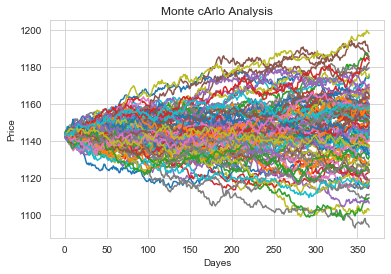

In [31]:
start_price = 1142.96
for run in range(100): 
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Dayes')
plt.ylabel('Price')
plt.title('Monte cArlo Analysis')

In [38]:

runs = 10000


simulations = np.zeros(runs)


np.set_printoptions(threshold=5)

for run in range(runs):    
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

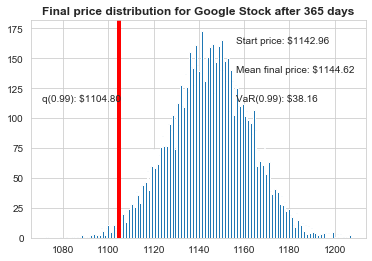

In [39]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');